In [1]:
import pandas as pd
import numpy as np
import hashlib

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.options.display.max_rows = None


In [2]:
df = pd.read_csv('../data/tweets/Q2_sanidadgob_V1.csv')
#df = pd.read_csv('/Users/mnd/Documents/master/thesis-code/data/tweets/Q2_sanidadgob_V1.csv')
print('Shape of initial query:',df.shape)

# This query did not have location limit, so we need to use User_Location column to perform a filter
# Remove Tweets without Location information
df = df.dropna(subset=['User_Location'])
df['User_Location'] = df['User_Location'].str.lower()
print('\nShape of database after removing unknown location:',df.shape)

# Keep only Tweets with markers signifying locations in Spanish
df = df[df['User_Location'].str.contains('españa|spain|spanien|madrid|santander|málaga|andalucia|cádiz|sevilla')]

print('\nShape of database after filtering for only locations marked as Spain:',df.shape)


Shape of initial query: (3131, 31)

Shape of database after removing unknown location: (3131, 31)

Shape of database after filtering for only locations marked as Spain: (3131, 31)


# Data Cleaning & Prep

In [3]:
df['Tweet_DateTime'] = pd.to_datetime(df['Tweet_DateTime'])

# Extract the date part of DateTime for less granular information
df['Tweet_Date'] = df['Tweet_DateTime'].dt.date

df.drop('Tweet_DateTime', axis=1, inplace=True)

df.head()

,Blue_Verified,Account_Created,User_Bio,Attached_URL,Favourites_Count,Followers_Count,Friends_Count,Listed_Count,User_Location,Media_Count,User_Name,Banner_URL,Profile_URL,User_Handle,Total_Tweets,Views_Count,Mentioned_User(s),Used_Hashtag(s),Attached_URL(s),Tweet_Content,Quote_Link,Tweet_Language,Likes_Count,Bookmarks_Count,Replies_Count,Retweets_Count,Quotes_Count,Tweet_URL,Tweet_ID,Conversation_ID,Tweet_Date
0,False,2010-12-30 09:00:21+00:00,"Ministerio de Sanidad, Gobierno de España | 💼 ...",sanidad.gob.es,12669,693487,709,4061,"madrid, españa",14087,Ministerio de Sanidad,https://pbs.twimg.com/profile_banners/23212412...,https://pbs.twimg.com/profile_images/176712153...,sanidadgob,30336,19913,NaN,NaN,https://www.sanidad.gob.es/gabinete/notasPrens...,"El 34,6% de los estudiantes de 12-13 años reco...",NaN,es,35,1,22,32,1,https://twitter.com/sanidadgob/status/17403034...,1740303400162525571,1740303400162525571,2023-12-28
1,False,2010-12-30 09:00:21+00:00,"Ministerio de Sanidad, Gobierno de España | 💼 ...",sanidad.gob.es,12669,693487,709,4061,"madrid, españa",14087,Ministerio de Sanidad,https://pbs.twimg.com/profile_banners/23212412...,https://pbs.twimg.com/profile_images/176712153...,sanidadgob,30336,8360,NaN,NaN,https://www.sanidad.gob.es/areas/calidadAsiste...,🗺️ Mapa de Recursos Sanitarios de Esclerosis L...,NaN,es,16,2,1,10,1,https://twitter.com/sanidadgob/status/17400530...,1740053057839542622,1740053057839542622,2023-12-27
2,False,2010-12-30 09:00:21+00:00,"Ministerio de Sanidad, Gobierno de España | 💼 ...",sanidad.gob.es,12669,693487,709,4061,"madrid, españa",14087,Ministerio de Sanidad,https://pbs.twimg.com/profile_banners/23212412...,https://pbs.twimg.com/profile_images/176712153...,sanidadgob,30336,7389,NaN,NaN,NaN,🔸 Tal y como consta en las actividades del Pla...,NaN,es,6,0,2,2,1,https://twitter.com/sanidadgob/status/17399464...,1739946470000787727,1739946466721124583,2023-12-27
3,False,2010-12-30 09:00:21+00:00,"Ministerio de Sanidad, Gobierno de España | 💼 ...",sanidad.gob.es,12669,693487,709,4061,"madrid, españa",14087,Ministerio de Sanidad,https://pbs.twimg.com/profile_banners/23212412...,https://pbs.twimg.com/profile_images/176712153...,sanidadgob,30336,63170,NaN,NaN,NaN,▶️ Se ha activado el nivel 2 de riesgo por baj...,NaN,es,70,5,13,39,49,https://twitter.com/sanidadgob/status/17399464...,1739946466721124583,1739946466721124583,2023-12-27
4,False,2010-12-30 09:00:21+00:00,"Ministerio de Sanidad, Gobierno de España | 💼 ...",sanidad.gob.es,12669,693487,709,4061,"madrid, españa",14087,Ministerio de Sanidad,https://pbs.twimg.com/profile_banners/23212412...,https://pbs.twimg.com/profile_images/176712153...,sanidadgob,30336,35068,NaN,NaN,https://www.sanidad.gob.es/areas/promocionPrev...,📝 La salud está presente en muchas de las leye...,NaN,es,97,28,4,61,3,https://twitter.com/sanidadgob/status/17396815...,1739681552714326421,1739681552714326421,2023-12-26


In [4]:
# We choose only columns that do not contain PII

columns_selected = ['Tweet_ID', 'Conversation_ID', 'Tweet_Content', 'Tweet_Date', 'Used_Hashtag(s)',
                    'Tweet_Language', 'Views_Count', 'Likes_Count', 'Replies_Count', 'Retweets_Count', 'Quotes_Count',
                    'Blue_Verified', 'Followers_Count', 'Total_Tweets']

df_cleaned = df[columns_selected].reset_index(drop=True)

# remove \r, n and t as this often messes up with export to csv
df_cleaned['Tweet_Content'] = df_cleaned['Tweet_Content'].str.replace('\r', ' ')
df_cleaned['Tweet_Content'] = df_cleaned['Tweet_Content'].str.replace('\n', ' ')
df_cleaned['Tweet_Content'] = df_cleaned['Tweet_Content'].str.replace('\t', ' ')


print('Shape of cleaned dataframe:', df_cleaned.shape)
df_cleaned.to_csv('original_dataset.csv')
df_cleaned.head(3)

Shape of cleaned dataframe: (3131, 14)


,Tweet_ID,Conversation_ID,Tweet_Content,Tweet_Date,Used_Hashtag(s),Tweet_Language,Views_Count,Likes_Count,Replies_Count,Retweets_Count,Quotes_Count,Blue_Verified,Followers_Count,Total_Tweets
0,1740303400162525571,1740303400162525571,"El 34,6% de los estudiantes de 12-13 años reco...",2023-12-28,NaN,es,19913,35,22,32,1,False,693487,30336
1,1740053057839542622,1740053057839542622,🗺️ Mapa de Recursos Sanitarios de Esclerosis L...,2023-12-27,NaN,es,8360,16,1,10,1,False,693487,30336
2,1739946470000787727,1739946466721124583,🔸 Tal y como consta en las actividades del Pla...,2023-12-27,NaN,es,7389,6,2,2,1,False,693487,30336


# Final checks for duplicates

In [5]:
print("Duplicated Tweet IDs\n",df_cleaned.duplicated(['Tweet_ID']).value_counts())

print("\nDuplicated Tweet Content\n",df_cleaned.duplicated(['Tweet_Content']).value_counts())
# there is no duplicated Tweet ID in our dataframes

Duplicated Tweet IDs
 False    3131
Name: count, dtype: int64

Duplicated Tweet Content
 False    3130
True        1
Name: count, dtype: int64


In [6]:
for tweet in df_cleaned[df_cleaned.duplicated(['Tweet_Content']) == True]['Tweet_Content']:
    print(tweet)

Las principales conclusiones a las que se ha llegado con respecto al incremento de casos COVID-19 en China son:  📌 La importancia de reforzar la vigilancia en Europa.   📌 La necesidad de implementar el análisis de las aguas residuales en aviones procedentes de China.  (2/4)


Those duplicated tweets seemed to be related to a campaign or an effort to gain traction/ evoke a discussion.  We decided to keep them in the dataframe.

# Dataset statistics

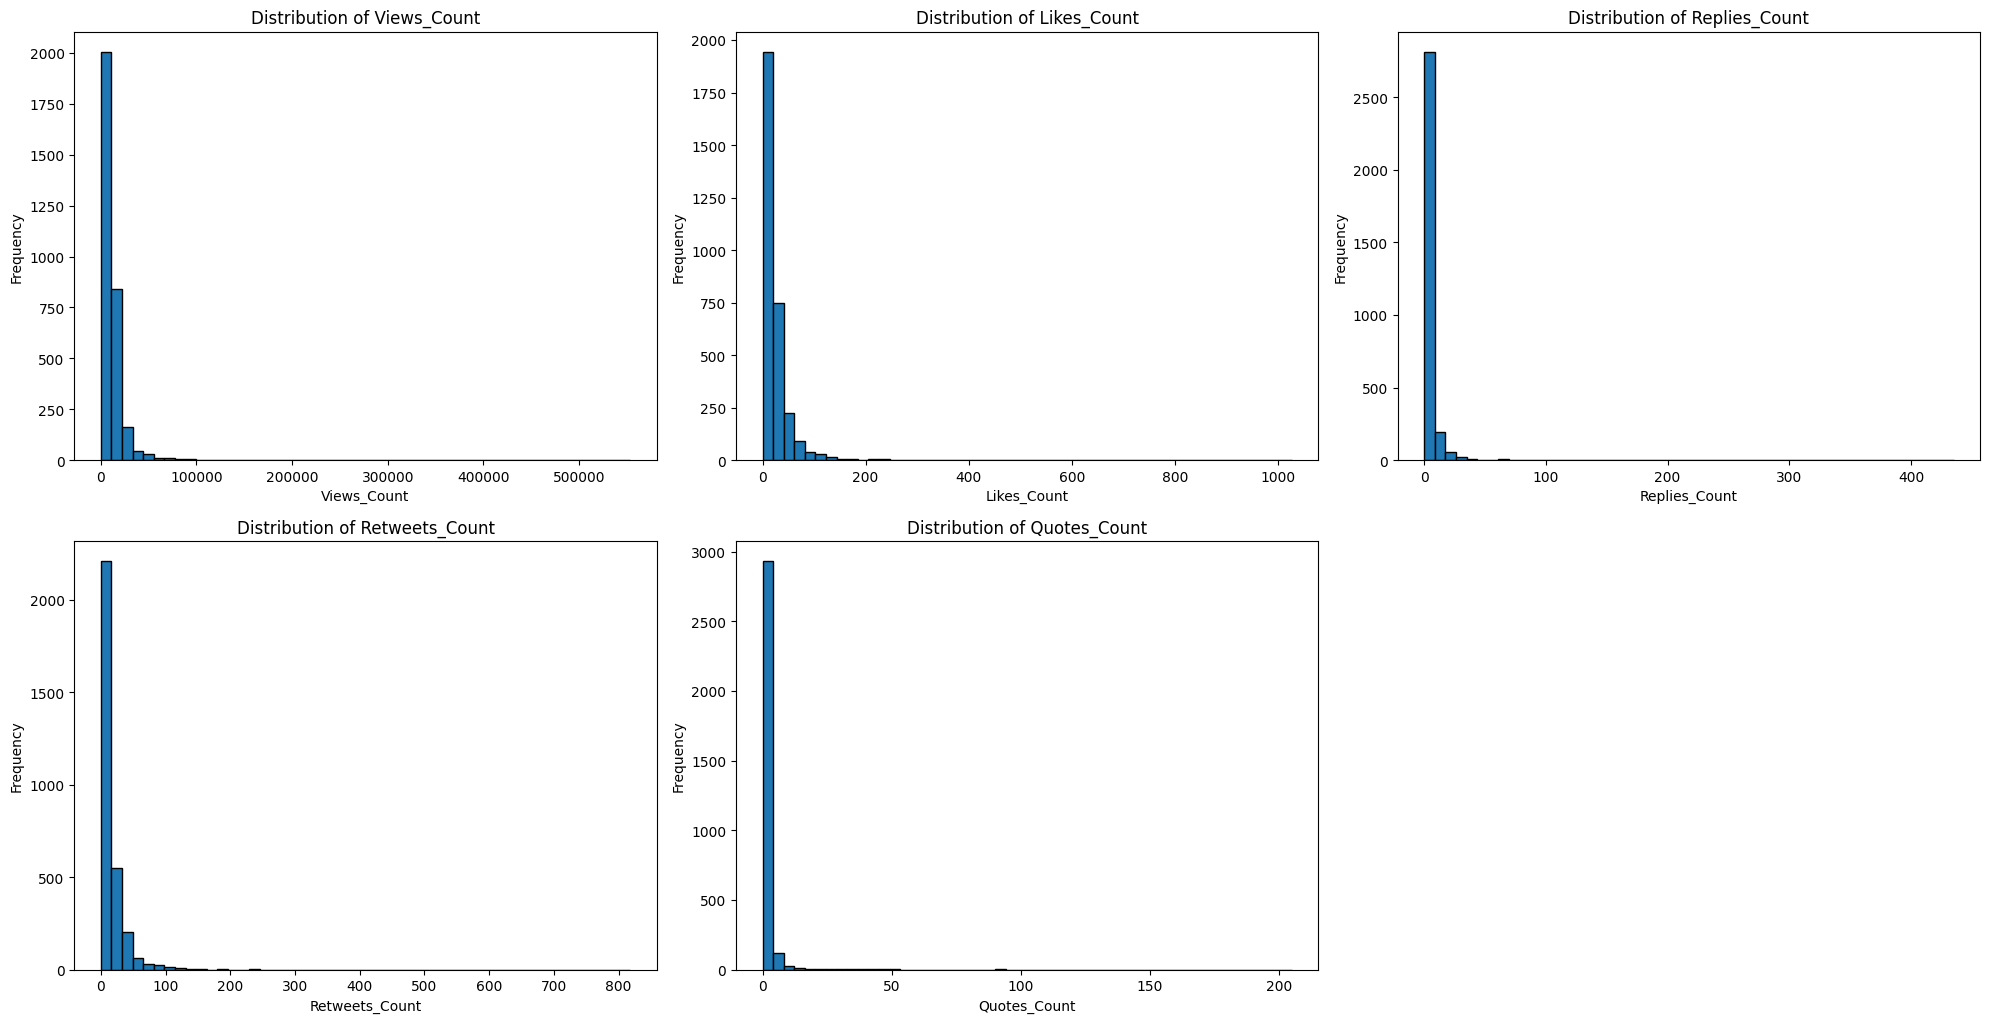

In [7]:
import matplotlib.pyplot as plt

# Select numeric columns for distribution analysis
numeric_columns = ['Views_Count', 'Likes_Count',
                   'Replies_Count', 'Retweets_Count', 'Quotes_Count']

# Plot distributions
plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    df_cleaned[column].plot(kind='hist', bins=50, edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Content preprocessing using Pysentimiento toolkit

Since pysentimiento may remove hashtags, let's ensure that we capture all the hashtags first

In [8]:
import re

df_preprocessed = df_cleaned.copy()

def extract_additional_hashtags(text):
    return re.findall(r'#\w+', text)

df_preprocessed['Additional_Hashtags'] = df_preprocessed['Tweet_Content'].apply(extract_additional_hashtags)

# Combine the existing 'Hashtag(s)_Used' column with the 'Additional_Hashtags' column
df_preprocessed['Combined_Hashtags'] = df_preprocessed.apply(
    lambda row: list(set(row['Used_Hashtag(s)'].split(',') if pd.notna(row['Used_Hashtag(s)']) else []) | set(row['Additional_Hashtags'])),
    axis=1
)
# Cleanup the list markers
df_preprocessed['Combined_Hashtags'] = df_preprocessed['Combined_Hashtags'].astype(str).str.replace('[\[\]]', '', regex=True)
df_preprocessed.drop(columns=['Additional_Hashtags'], inplace=True)

print('Shape of dataframe for preprocess', df_preprocessed.shape)

df_preprocessed.head()

Shape of dataframe for preprocess (3131, 15)


,Tweet_ID,Conversation_ID,Tweet_Content,Tweet_Date,Used_Hashtag(s),Tweet_Language,Views_Count,Likes_Count,Replies_Count,Retweets_Count,Quotes_Count,Blue_Verified,Followers_Count,Total_Tweets,Combined_Hashtags
0,1740303400162525571,1740303400162525571,"El 34,6% de los estudiantes de 12-13 años reco...",2023-12-28,NaN,es,19913,35,22,32,1,False,693487,30336,
1,1740053057839542622,1740053057839542622,🗺️ Mapa de Recursos Sanitarios de Esclerosis L...,2023-12-27,NaN,es,8360,16,1,10,1,False,693487,30336,
2,1739946470000787727,1739946466721124583,🔸 Tal y como consta en las actividades del Pla...,2023-12-27,NaN,es,7389,6,2,2,1,False,693487,30336,
3,1739946466721124583,1739946466721124583,▶️ Se ha activado el nivel 2 de riesgo por baj...,2023-12-27,NaN,es,63170,70,13,39,49,False,693487,30336,
4,1739681552714326421,1739681552714326421,📝 La salud está presente en muchas de las leye...,2023-12-26,NaN,es,35068,97,4,61,3,False,693487,30336,


In [3]:
#!pip install pysentimiento --q

In [10]:
from pysentimiento.preprocessing import preprocess_tweet

In [11]:
def clean_tweets(tweet):
    # Replaces user handles and URLs by special tokens
    # Shortens repeated characters
    # Normalizes laughters
    # Handles hashtags
    # Handles emojis
    cleaned = preprocess_tweet(tweet)
    return cleaned.replace('@usuario', '').replace('\n', ' ')

df_preprocessed['Tweet_cleaned'] = df_preprocessed['Tweet_Content'].apply(clean_tweets)
df_preprocessed.drop(columns=['Tweet_Content'], inplace=True)

print('Shape of dataframe after preprocess',df_preprocessed.shape)
df_preprocessed.head(3)

Shape of dataframe after preprocess (3131, 15)


,Tweet_ID,Conversation_ID,Tweet_Date,Used_Hashtag(s),Tweet_Language,Views_Count,Likes_Count,Replies_Count,Retweets_Count,Quotes_Count,Blue_Verified,Followers_Count,Total_Tweets,Combined_Hashtags,Tweet_cleaned
0,1740303400162525571,1740303400162525571,2023-12-28,NaN,es,19913,35,22,32,1,False,693487,30336,,"El 34,6% de los estudiantes de 12-13 años reco..."
1,1740053057839542622,1740053057839542622,2023-12-27,NaN,es,8360,16,1,10,1,False,693487,30336,,emoji mapa mundial emoji Mapa de Recursos San...
2,1739946470000787727,1739946466721124583,2023-12-27,NaN,es,7389,6,2,2,1,False,693487,30336,,emoji rombo naranja pequeño emoji Tal y como ...


In [12]:
# emojis are masked with 'emoji', url and user mentions are replaced by placeholders.  We reove them as we already have columns for those

import re

def remove_substrings(text, substrings):
    # Define the regex pattern for 'emoji'
    emoji_pattern = r'emoji\s.*?emoji'
    # Remove the 'emoji' pattern
    text = re.sub(emoji_pattern, '', text).strip()

    # Remove other substrings
    for substring in substrings:
        text = text.replace(substring, '')

    return text

# List of substrings to remove
substrings_to_remove = ['url', '@usuario', 'usuario']

df_analysis = df_preprocessed.copy()

print('Shape of dataframe for analysis', df_analysis.shape)
# Apply the function to the DataFrame
df_analysis['Tweet_cleaned'] = df_analysis['Tweet_cleaned'].apply(remove_substrings, substrings=substrings_to_remove)
df_analysis.head()

Shape of dataframe for analysis (3131, 15)


,Tweet_ID,Conversation_ID,Tweet_Date,Used_Hashtag(s),Tweet_Language,Views_Count,Likes_Count,Replies_Count,Retweets_Count,Quotes_Count,Blue_Verified,Followers_Count,Total_Tweets,Combined_Hashtags,Tweet_cleaned
0,1740303400162525571,1740303400162525571,2023-12-28,NaN,es,19913,35,22,32,1,False,693487,30336,,"El 34,6% de los estudiantes de 12-13 años reco..."
1,1740053057839542622,1740053057839542622,2023-12-27,NaN,es,8360,16,1,10,1,False,693487,30336,,Mapa de Recursos Sanitarios de Esclerosis Late...
2,1739946470000787727,1739946466721124583,2023-12-27,NaN,es,7389,6,2,2,1,False,693487,30336,,Tal y como consta en las actividades del Plan ...
3,1739946466721124583,1739946466721124583,2023-12-27,NaN,es,63170,70,13,39,49,False,693487,30336,,Se ha activado el nivel 2 de riesgo por bajas ...
4,1739681552714326421,1739681552714326421,2023-12-26,NaN,es,35068,97,4,61,3,False,693487,30336,,La salud está presente en muchas de las leyes ...


In [13]:
print('\nShape of database after filtering all tweet contents:',df_analysis.shape)


Shape of database after filtering all tweet contents: (3131, 15)


# Get Mental Health Tweets

In [14]:
# Define the words to search for
keywords = 'salud mental|ansi|depresi|suici'

# Filter the DataFrame
df_analysis = df_analysis[df_analysis['Tweet_cleaned'].str.contains(keywords, regex=True, case=False)]
df_analysis.head()

,Tweet_ID,Conversation_ID,Tweet_Date,Used_Hashtag(s),Tweet_Language,Views_Count,Likes_Count,Replies_Count,Retweets_Count,Quotes_Count,Blue_Verified,Followers_Count,Total_Tweets,Combined_Hashtags,Tweet_cleaned
14,1737797362586632603,1737797358677594178,2023-12-21,NaN,es,724,12,1,5,0,False,693487,30336,,La aplicación de este protocolo será determina...
17,1737449198558097833,1737449198558097833,2023-12-20,NaN,es,6852,7,3,3,1,False,693487,30336,,"Sanidad aporta 1,5 millones para atender la sa..."
27,1734911704851460573,1734911704851460573,2023-12-13,NaN,es,6285,22,7,11,0,False,693487,30336,,"El secretario de estado de Sanidad, , presenta..."
48,1730291203495625158,1730291200190566545,2023-11-30,#EU2023ES,es,4443,10,2,4,0,False,693487,30336,'#EU2023ES',"El Consejo Empleo, Política Social, Sanidad y ..."
49,1730291200190566545,1730291200190566545,2023-11-30,NaN,es,17876,122,33,54,4,False,693487,30336,,"La ministra de Sanidad, , destaca el acuerdo a..."


In [15]:
print('\nShape of database after filtering for tweets containing mental health, anxiety, or depression:',df_analysis.shape)


Shape of database after filtering for tweets containing mental health, anxiety, or depression: (174, 15)


# Sentiment Analysis execution

In [16]:
from pysentimiento import create_analyzer
from tqdm import tqdm

analyzer = create_analyzer(task="sentiment", lang="es")

def analyze_sentiment(text):
    result = analyzer.predict(text)
    label = result.output
    confidence = result.probas[label]
    return pd.Series([label, confidence])

# Add tqdm to apply method to show progress
tqdm.pandas()

# Apply the function to the 'Tweet_cleaned' column with progress bar
df_analysis[['label', 'confidence']] = df_analysis['Tweet_cleaned'].progress_apply(analyze_sentiment)
df_analysis = df_analysis.rename(columns={'label': 'py_label', 'confidence': 'py_confidence'})
df_analysis['py_label'] = df_analysis['py_label'].str.lower()

print(df_analysis.shape)
df_analysis.head(3)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
100%|██████████| 174/174 [00:05<00:00, 32.08it/s]

(174, 17)


,Tweet_ID,Conversation_ID,Tweet_Date,Used_Hashtag(s),Tweet_Language,Views_Count,Likes_Count,Replies_Count,Retweets_Count,Quotes_Count,Blue_Verified,Followers_Count,Total_Tweets,Combined_Hashtags,Tweet_cleaned,py_label,py_confidence
14,1737797362586632603,1737797358677594178,2023-12-21,NaN,es,724,12,1,5,0,False,693487,30336,,La aplicación de este protocolo será determina...,neu,0.680486
17,1737449198558097833,1737449198558097833,2023-12-20,NaN,es,6852,7,3,3,1,False,693487,30336,,"Sanidad aporta 1,5 millones para atender la sa...",neu,0.591481
27,1734911704851460573,1734911704851460573,2023-12-13,NaN,es,6285,22,7,11,0,False,693487,30336,,"El secretario de estado de Sanidad, , presenta...",pos,0.566831


In [17]:
df_analysis.head(3)

,Tweet_ID,Conversation_ID,Tweet_Date,Used_Hashtag(s),Tweet_Language,Views_Count,Likes_Count,Replies_Count,Retweets_Count,Quotes_Count,Blue_Verified,Followers_Count,Total_Tweets,Combined_Hashtags,Tweet_cleaned,py_label,py_confidence
14,1737797362586632603,1737797358677594178,2023-12-21,NaN,es,724,12,1,5,0,False,693487,30336,,La aplicación de este protocolo será determina...,neu,0.680486
17,1737449198558097833,1737449198558097833,2023-12-20,NaN,es,6852,7,3,3,1,False,693487,30336,,"Sanidad aporta 1,5 millones para atender la sa...",neu,0.591481
27,1734911704851460573,1734911704851460573,2023-12-13,NaN,es,6285,22,7,11,0,False,693487,30336,,"El secretario de estado de Sanidad, , presenta...",pos,0.566831


# Analisis Tweets Ministerio de Sanidad

In [18]:
df_analysis[['Likes_Count', 'Replies_Count', 'Retweets_Count', 'Quotes_Count']].describe()

,Likes_Count,Replies_Count,Retweets_Count,Quotes_Count
count,174.000000,174.000000,174.000000,174.000000
mean,31.114943,3.471264,24.287356,2.143678
std,62.886801,6.673802,50.596764,8.882472
min,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,3.000000,0.000000
50%,19.000000,1.000000,9.500000,0.000000
75%,36.750000,3.000000,31.750000,2.000000
max,725.000000,65.000000,498.000000,91.000000


In [19]:
df_spanish = df_analysis.copy()

In [20]:
df_spanish.head()

,Tweet_ID,Conversation_ID,Tweet_Date,Used_Hashtag(s),Tweet_Language,Views_Count,Likes_Count,Replies_Count,Retweets_Count,Quotes_Count,Blue_Verified,Followers_Count,Total_Tweets,Combined_Hashtags,Tweet_cleaned,py_label,py_confidence
14,1737797362586632603,1737797358677594178,2023-12-21,NaN,es,724,12,1,5,0,False,693487,30336,,La aplicación de este protocolo será determina...,neu,0.680486
17,1737449198558097833,1737449198558097833,2023-12-20,NaN,es,6852,7,3,3,1,False,693487,30336,,"Sanidad aporta 1,5 millones para atender la sa...",neu,0.591481
27,1734911704851460573,1734911704851460573,2023-12-13,NaN,es,6285,22,7,11,0,False,693487,30336,,"El secretario de estado de Sanidad, , presenta...",pos,0.566831
48,1730291203495625158,1730291200190566545,2023-11-30,#EU2023ES,es,4443,10,2,4,0,False,693487,30336,'#EU2023ES',"El Consejo Empleo, Política Social, Sanidad y ...",pos,0.550383
49,1730291200190566545,1730291200190566545,2023-11-30,NaN,es,17876,122,33,54,4,False,693487,30336,,"La ministra de Sanidad, , destaca el acuerdo a...",pos,0.522127


In [21]:
# Get all unique hashtags inside the nested list of 'Combined_Hashtags' column
hashtags = df_spanish['Combined_Hashtags'].dropna().str.split(', ').explode()

# Remove duplicates
unique_hashtags = hashtags.str.strip().drop_duplicates()

In [22]:
#Let's count the tweets for each hashtag based on the exploded list
tweet_count = {}
for hashtag in hashtags:
    tmp_df = df_spanish[df_spanish['Combined_Hashtags'].str.contains(hashtag, na=False)]
    tweet_count[hashtag] = tmp_df['Tweet_ID'].count()
    
#df_spanish.loc[:,'Combined_Hashtags'] = df_spanish['Combined_Hashtags'].str.lower()
#df_spanish.loc[:,'Combined_Hashtags'] = df_spanish['Combined_Hashtags'].str.replace("'", "")

In [23]:
hashtag_stats = {}

# Iterate over each unique hashtag in the exploded list
for hashtag in unique_hashtags:
    # Filter the DataFrame for the current hashtag
    hashtag_df = df_spanish[df_spanish['Combined_Hashtags'].str.contains(hashtag, na=False)]

    # Calculate the sums of the specified columns
    sums = hashtag_df[['Views_Count', 'Likes_Count', 'Replies_Count', 'Retweets_Count', 'Quotes_Count']].sum()

    # Calculate the number of unique tweets containing the hashtag
    tweet_count = hashtag_df['Tweet_ID'].nunique()


    # Store the results in the dictionary
    hashtag_stats[hashtag] = {
        'Views_Count': sums['Views_Count'],
        'Likes_Count': sums['Likes_Count'],
        'Replies_Count': sums['Replies_Count'],
        'Retweets_Count': sums['Retweets_Count'],
        'Quotes_Count': sums['Quotes_Count'],
        'Tweet_Count': tweet_count,
    }

# Convert the dictionary to a DataFrame for easier viewing
hashtag_stats_df = pd.DataFrame(hashtag_stats).transpose()

top_hashtags_df = hashtag_stats_df.sort_values(by=['Tweet_Count'], ascending=False).head(12)
top_hashtags_df.drop('', inplace=True)
top_hashtags_df

,Views_Count,Likes_Count,Replies_Count,Retweets_Count,Quotes_Count,Tweet_Count
'#SaludMental',1387787,2420,290,1598,231,61
'#LlamaALaVida',610091,1572,112,1573,69,34
'#EU2023ES',140354,345,38,204,12,25
' #SaludMental',130338,306,53,203,18,13
' #EU2023ES',84767,216,17,135,6,11
' #LlamaALaVida',148441,335,38,313,11,7
'#MentalHealthSummit',15391,29,9,14,2,7
'#PorLaVida',100293,214,29,185,7,6
'#ConductaSuicida',128405,281,29,269,9,6
'#SiTePicaNotifica',126137,207,37,170,28,5


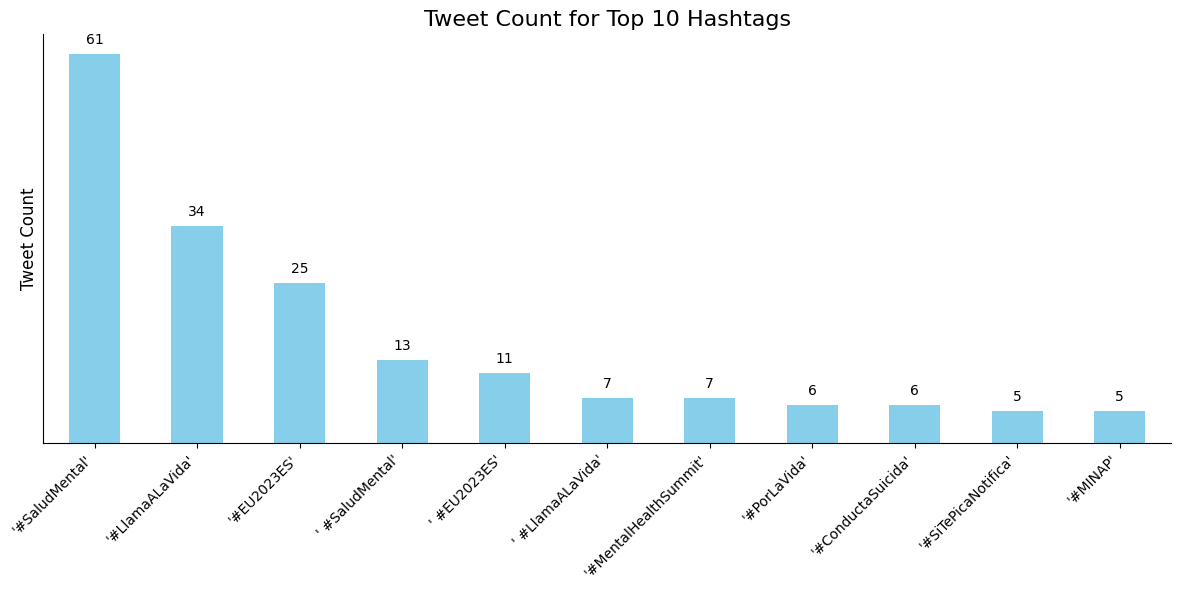

In [24]:
plt.figure(figsize=(12, 6))
ax = top_hashtags_df['Tweet_Count'].plot(kind='bar', color='skyblue')

# Adding titles and labels
plt.title('Tweet Count for Top 10 Hashtags', fontsize=16)
plt.ylabel('Tweet Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
ax.yaxis.set_ticks([])

# Removing the top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

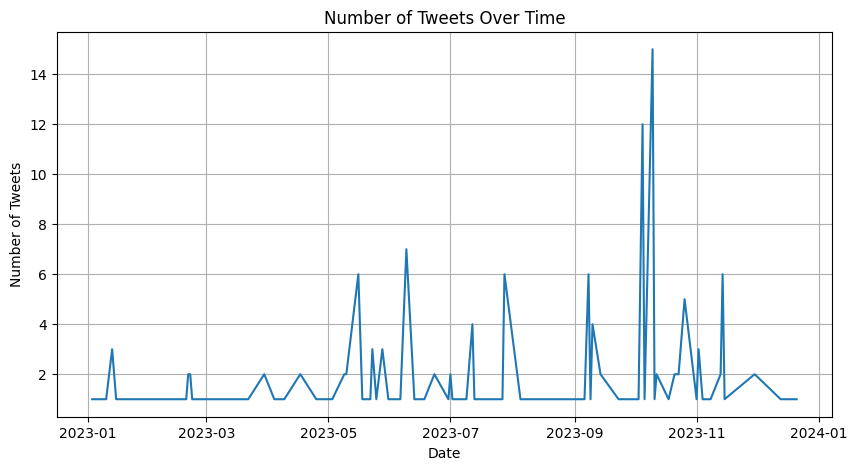

In [25]:
df_tweet = df_spanish.copy()

df_tweet.set_index('Tweet_Date', inplace=True)

# Resample the data to get the count of tweets per day
tweets_per_day = df_analysis.groupby('Tweet_Date').size()

# Plot the data
plt.figure(figsize=(10, 5))
tweets_per_day.plot(kind='line')
plt.title('Number of Tweets Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()

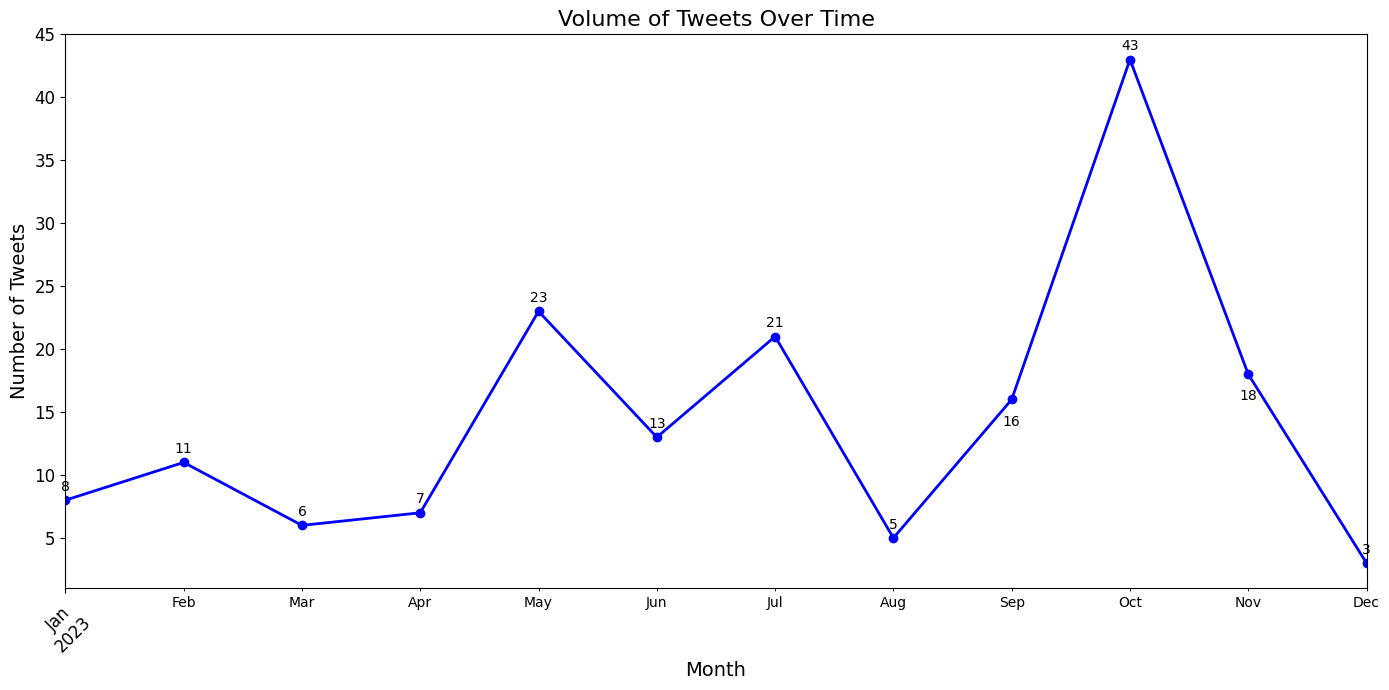

In [26]:
df_spanish.loc[:,'Tweet_Date'] = pd.to_datetime(df_spanish['Tweet_Date'])

df_spanish['Tweet_Date'] = pd.to_datetime(df_analysis['Tweet_Date'])

df_spanish.loc[:,'Month'] = df_spanish['Tweet_Date'].dt.to_period('M')

# Volume of tweets over time
tweet_volume = df_spanish.groupby('Month').size()

# Plot volume of tweets over time
plt.figure(figsize=(14, 7))
ax = tweet_volume.plot(kind='line', marker='o', linestyle='-', color='b', markersize=6, linewidth=2)

# Set title and labels with increased font size
plt.title('Volume of Tweets Over Time', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Tweets', fontsize=14)

# Remove gridlines for a cleaner look
ax.grid(False)

# Customize ticks
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Add text annotations
for i in range(len(tweet_volume)):
    month = tweet_volume.index[i].month
    if month == 9 or month == 11:  # September and November
        plt.text(tweet_volume.index[i].start_time, tweet_volume.iloc[i] - 1.2, str(tweet_volume.iloc[i]),
                 ha='center', va='top', fontsize=10, color='black')
    else:
        plt.text(tweet_volume.index[i].start_time, tweet_volume.iloc[i] + 0.5, str(tweet_volume.iloc[i]),
                 ha='center', va='bottom', fontsize=10, color='black')
# Add a tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [27]:
from tabulate import tabulate

def get_most_popular_tweets(df, column, top_n=5):
    return df.nlargest(top_n, column)[['Tweet_ID', column, 'Tweet_cleaned']]

# Function to print the dataframe in a nice table format
def print_table(df, title):
    print(f"\n{title}\n")
    print(tabulate(df, headers='keys', tablefmt='psql', showindex=False))

# Get the top 5 most viewed tweets
most_viewed_tweets = get_most_popular_tweets(df_spanish, 'Views_Count')
print_table(most_viewed_tweets, "Most Viewed Tweets")

# Get the top 5 most liked tweets
most_liked_tweets = get_most_popular_tweets(df_spanish, 'Likes_Count')
print_table(most_liked_tweets, "Most Liked Tweets")

# Get the top 5 most replied tweets
most_replied_tweets = get_most_popular_tweets(df_spanish, 'Replies_Count')
print_table(most_replied_tweets, "Most Replied Tweets")

# Get the top 5 most retweeted tweets
most_retweeted_tweets = get_most_popular_tweets(df_spanish, 'Retweets_Count')
print_table(most_retweeted_tweets, "Most Retweeted Tweets")

# Get the top 5 most quoted tweets
most_quoted_tweets = get_most_popular_tweets(df_spanish, 'Quotes_Count')
print_table(most_quoted_tweets, "Most Quoted Tweets")


Most Viewed Tweets

+---------------------+---------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|            Tweet_ID |   Views_Count | Tweet_cleaned                                                                                                                                                                                                                                                                                |
|---------------------+---------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Word Cloud

In [28]:
!wget https://setup.johnsnowlabs.com/nlu/colab.sh -O - | bash


import nlu

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


--2024-06-22 16:56:19--  https://setup.johnsnowlabs.com/nlu/colab.sh
Resolving setup.johnsnowlabs.com (setup.johnsnowlabs.com)... 3.86.22.73
Connecting to setup.johnsnowlabs.com (setup.johnsnowlabs.com)|3.86.22.73|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh [following]
--2024-06-22 16:56:20--  https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1212 (1.2K) [text/plain]
Saving to: ‘STDOUT’

-                   100%[===================>]   1.18K  --.-KB/s    in 0s      

2024-06-22 16:56:20 (68.0 MB/s) - written to stdout [1212/1212]

Installing PySpark 3.2.1

In [29]:
pipe = nlu.load('stopwords')

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
The operation couldn’t be completed. Unable to locate a Java Runtime.
Please visit http://www.java.com for information on installing Java.

/Users/mnd/.pyenv/versions/3.10.12/envs/thesis/lib/python3.10/site-packages/pyspark/bin/spark-class: line 96: CMD: bad array subscript
head: illegal line count -- -1


RuntimeError: Java gateway process exited before sending its port number

In [ ]:
!pip install stop-words

  Preparing metadata (setup.py) ... done
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32895 sha256=aec9a8f62386e5b85ea5d33a2990c46445e3ac4cdda5c7801641500e6f772459
  Stored in directory: /root/.cache/pip/wheels/d0/1a/23/f12552a50cb09bcc1694a5ebb6c2cd5f2a0311de2b8c3d9a89
Successfully built stop-words


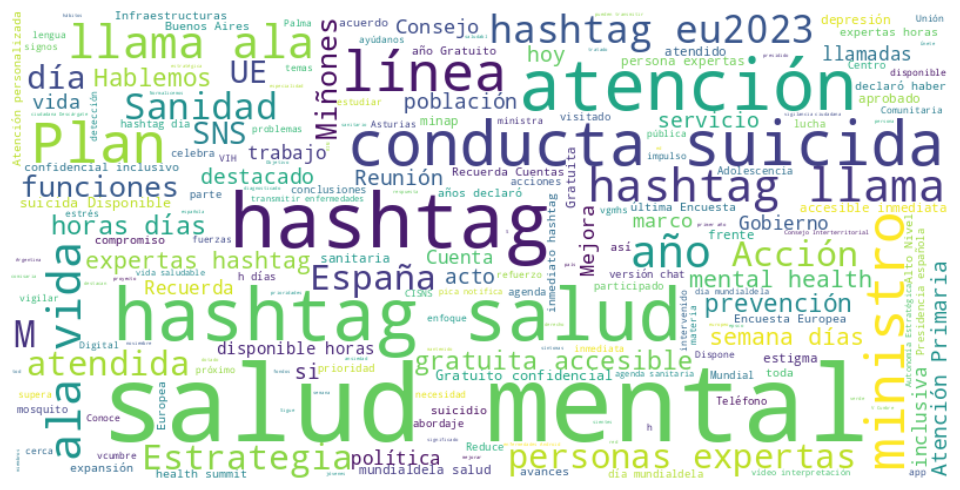

In [ ]:
def generate_wordcloud(text):
    stopwords = get_stop_words('es')
    wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=800, height=400).generate(text)
    return wordcloud


# Combine all tweets into a single text
text = " ".join(tweet for tweet in df_analysis['Tweet_cleaned'] if pd.notnull(tweet))

# Function to generate word cloud from text
def generate_wordcloud(text):
    stopwords = get_stop_words('es')
    wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=800, height=400).generate(text)
    return wordcloud

# Generate the word cloud
wordcloud = generate_wordcloud(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()



# Tweets de Llama a la Vida

In [30]:
# Filter tweets containing the word 'llama'
tweets_llama = df_spanish[df_spanish['Tweet_cleaned'].str.contains('llama', case=False, na=False)]

# Display the tweets
tweets_llama[['Tweet_ID', 'Likes_Count', 'Tweet_cleaned']]

,Tweet_ID,Likes_Count,Tweet_cleaned
105,1724343912616390794,34,Ya disponible la versión chat de la línea 024 ...
164,1722211945842196528,9,→ Miñones ha aplaudido la colaboración prestad...
180,1721807199687614866,71,El suicidio es la principal causa de muerte en...
229,1719995260644798597,28,La línea de atención a la conducta suicida 024...
302,1717519228994027565,4,También destacan: La Línea 024 con más de 1...
354,1715782500385951956,31,El 024 es la línea de atención a la conducta s...
409,1714545599322669547,22,"👁‍🗨 Recuerda. Cuentas con el 024, la Línea de ..."
476,1712007628057133486,13,Ya disponible la versión chat de la línea 024 ...
549,1709108524310298932,36,La línea de atención a la conducta suicida 024...
744,1702223154461184413,73,Recuerda. Cuando sientas que te faltan las fue...


In [31]:
tweets_llama_count = len(tweets_llama)
print(f"Number of tweets containing the word 'llama': {tweets_llama_count}")

Number of tweets containing the word 'llama': 41


## Educational content in Ministerio de Salud Tweets

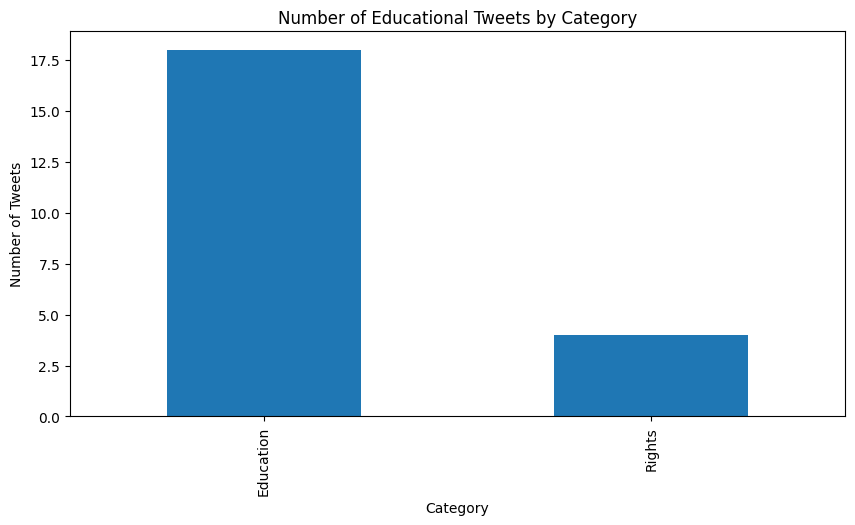

In [49]:

# Define expanded keywords for categorization
keywords_rights = [
    ['derechos', 'salud mental'], ['acceso', 'servicios de salud mental'], ['seguridad social'],
    ['derecho', 'salud mental'], ['servicios públicos', 'salud mental'], ['acceso', 'instalaciones de salud mental'],
    ['derechos humanos', 'salud mental'], ['cobertura', 'salud mental'], ['acceso equitativo', 'salud mental'],
    ['derechos del paciente'], ['servicios', 'salud mental', 'gratuitos']
]

keywords_education = [
    ['educación', 'salud mental'], ['reducción del estigma'], ['reconocer problemas', 'salud mental'],
    ['apoyo profesional', 'salud mental'], ['cómo acceder', 'salud mental'],
    ['información', 'salud mental'], ['bienestar mental'], ['intervenciones', 'salud mental'],
    ['prevención', 'salud mental'], ['formación', 'salud mental'], ['recursos', 'salud mental'],
    ['cuidar a', 'experto'], ['cuidar a', 'psicólogo'], ['cuidar a', 'psiquiatra'],
    ['autocuidado', 'experto'], ['autocuidado', 'psicólogo'], ['autocuidado', 'psiquiatra']
]

# Function to check if all keywords in a group are in the tweet
def check_keywords_in_tweet(tweet, keyword_group):
    return all(re.search(keyword, tweet, re.IGNORECASE) for keyword in keyword_group)

# Function to categorize tweets
def categorize_tweet(tweet, keywords):
    for keyword_group in keywords:
        if check_keywords_in_tweet(tweet, keyword_group):
            return True
    return False

# Apply categorization
df_spanish['Category'] = df_spanish['Tweet_cleaned'].apply(lambda x: 'Rights' if categorize_tweet(x, keywords_rights) else 
                                   ('Education' if categorize_tweet(x, keywords_education) else 'Other'))

# Filter educational content
df_education = df_spanish[df_spanish['Category'].isin(['Rights', 'Education'])]

plt.figure(figsize=(10, 5))
df_education['Category'].value_counts().plot(kind='bar')
plt.title('Number of Educational Tweets by Category')
plt.xlabel('Category')
plt.ylabel('Number of Tweets')
plt.show()


In [59]:
df_education[['Tweet_Date','Tweet_cleaned', 'Category']].sort_values(by=['Tweet_Date'])

,Tweet_Date,Tweet_cleaned,Category
2716,2023-02-19,Conoce la Estrategia de salud mental 2022-2026 del SNS Entre sus 10 líneas estratégicas destacan la Atención a la Infancia y la Adolescencia o la prevención y atención de la Conducta Suicida. Accede por la vida,Education
2086,2023-04-27,"ha mantenido una reunión de trabajo con representantes del Consejo de la Juventud de España Entre los asuntos tratados, el Plan de salud mental, el 024 de atención a la conducta suicida o la prevención del VIH y otras ITS.",Education
1894,2023-05-16,"10:30 h. El ministro de Sanidad, , participa en el acto de inauguración del XXII Congreso de '40 años por la salud mental, por los derechos, por ti', presidido por S.M. la reina Letizia. En directo 40 años salud mental",Rights
1892,2023-05-16,"El ministro aboga por un abordaje de la salud mental basado en la prevención, la detección, el tratamiento y la recuperación La salud mental también es un derecho salud mental",Rights
1808,2023-05-23,"El CMIN también ha aprobado 38,5 M$ para atender la Salud Mental 24 M$ para prevención, detección precoz y atención, así como a la sensibilización y lucha contra el estigma 14,5 M$ para mejorar infraestructuras en Salud Mental comunitaria y equipamiento clínico",Education
1651,2023-06-09,"En el acto también han participado Dolors López, coordinadora del Plan de Formación en Prevención, Detección e Intervención del suicidio de la ; y Fátima Cabello, subdirectora del Área de Conocimiento de Salud salud mental",Education
1384,2023-07-01,"Los hábitos de vida saludable con programas como Patios Abiertos-En Plan Bien, las acciones de prevención frente a la enfermedad y las adicciones, la ampliación del calendario vacunal o el abordaje de la Salud Mental infanto-juvenil han sido algunos temas tratados",Education
1098,2023-07-28,Temas destacados: Autonomía Estratégica Sanitaria Salud Mental Salud Digital Hábitos saludables Prevención eu2023 es,Education
1091,2023-07-28,"Toda la UE coincide en la necesidad de integrar la salud mental en todas las políticas de forma trasversal Con el foco puesto en jóvenes, población vulnerable y la prevención Priorizar la Salud Mental es una cuestión de voluntad política eu2023 es",Education
1086,2023-07-28,"La digitalización de la sanidad, la autonomía estratégica abierta frente a alertas sanitarias, y la prevención, el tratamiento y el seguimiento de las enfermedades más prevalentes, así como el cuidado de la salud mental son aspectos cruciales de esa estrategia. eu2023 es",Education


In [57]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

education_df = df_education.groupby(['Tweet_Date', 'py_label'])['Tweet_ID'].count().unstack(fill_value=0)

print('Educational Posts from Ministerio de Sanidad', education_df.shape)
fig = go.Figure()

for label in education_df.columns:
    fig.add_trace(go.Scatter(x=education_df.index, y=education_df[label], mode='lines', name=f'py_label: {label}'))

fig.update_layout(
    title='Educational Posts from Ministerio de Sanidad',
    legend=dict(
        x=0,
        y=1,
        traceorder='normal',
        bgcolor='rgba(0,0,0,0)',
        bordercolor='rgba(0,0,0,0)'
    )
)

fig.show()

Educational Posts from Ministerio de Sanidad (14, 2)
